In [1]:
import Levenshtein
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

from helper_functions import *

Import Three different dataset. The First dataset that used for pretraining, The antioxidant dataset, and the generated dataset

In [2]:
pretrain_df = pd.read_csv("data\general_peptide_data.csv")
antiox_df = pd.read_csv("data\df_antiox_peptide_data.csv")
gen_data = pd.read_csv("data\Filter_Gen_Data.csv")

Barplots for three datasets for total number of amino acids

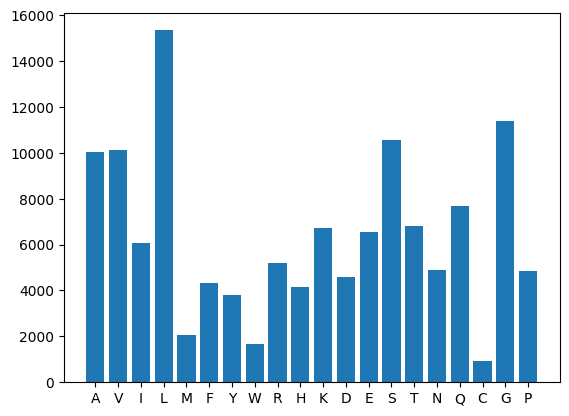

In [3]:
pretrain_df_list = pretrain_df.Sequence.values.tolist()
pretrain_df_list_counts = AnalyzeComposition(pretrain_df_list)
aa_labels = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W', 'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P']

plt.bar(aa_labels, pretrain_df_list_counts)
plt.savefig('plots/barplots/pretrain_df_aa_distribution.pdf')

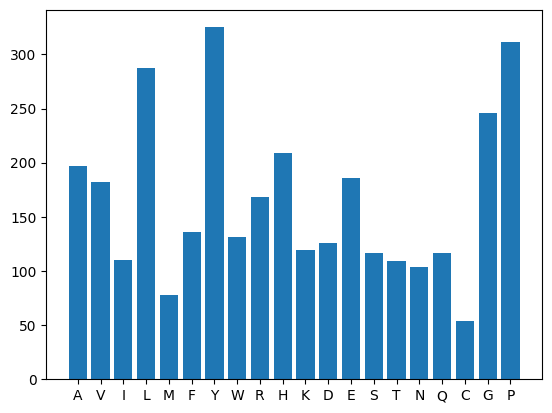

In [4]:
antiox_df_list = antiox_df.Sequence.values.tolist()
antiox_df_list_counts = AnalyzeComposition(antiox_df_list)
aa_labels = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W', 'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P']

plt.bar(aa_labels, antiox_df_list_counts)
plt.savefig('plots/barplots/antiox_df_aa_distribution.pdf')

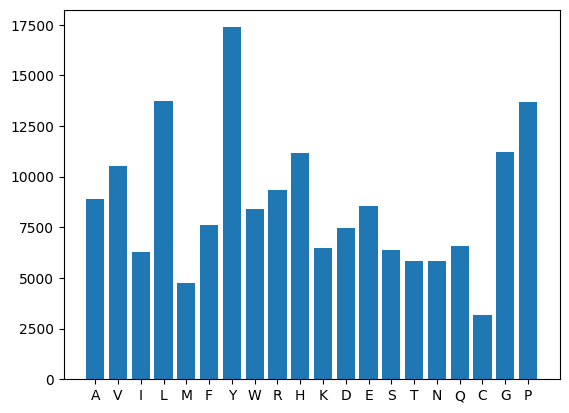

In [5]:
gen_data_list = gen_data.Sequence.values.tolist()
gen_data_list_counts = AnalyzeComposition(gen_data_list)
aa_labels = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W', 'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P']

plt.bar(aa_labels, gen_data_list_counts)
plt.savefig('plots/barplots/gen_data_aa_distribution.pdf')

bar plots for mean fraction

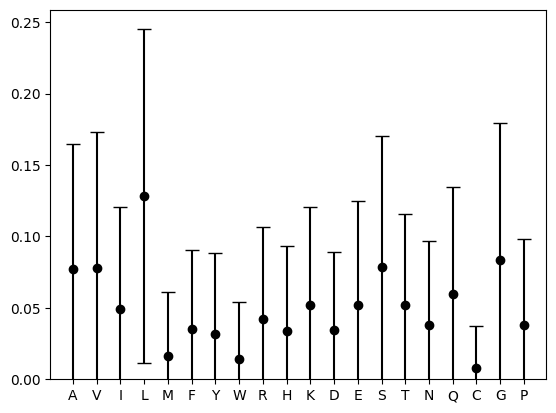

In [6]:
aa_labels = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W', 'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P']
x_pos = np.arange(len(aa_labels))
pretrain_df_mean, pretrain_df_std = AnalyzeCompositionFraction(pretrain_df_list)

fig, ax = plt.subplots()
ax.errorbar(x_pos, pretrain_df_mean, yerr=pretrain_df_std, fmt='o', color='black', capsize=5)
ax.set_xticks(x_pos)
ax.set_xticklabels(aa_labels)
ax.set_ylim(ymin=0)

plt.savefig('plots/barplots/pretrain_df_aafraction_distribution_stdev.pdf')

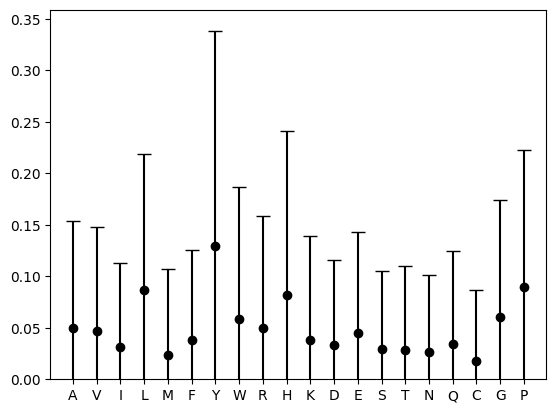

In [7]:
aa_labels = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W', 'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P']
x_pos = np.arange(len(aa_labels))
antiox_df_mean, antiox_df_std = AnalyzeCompositionFraction(antiox_df_list)

fig, ax = plt.subplots()
ax.errorbar(x_pos, antiox_df_mean, yerr=antiox_df_std, fmt='o', color='black', capsize=5)
ax.set_xticks(x_pos)
ax.set_xticklabels(aa_labels)
ax.set_ylim(ymin=0)

plt.savefig('plots/barplots/antiox_df_aafraction_distribution_stdev.pdf')

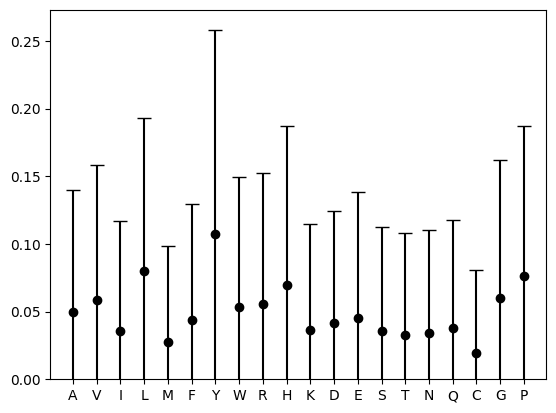

In [8]:
aa_labels = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W', 'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P']
x_pos = np.arange(len(aa_labels))
gen_data_mean, gen_data_std = AnalyzeCompositionFraction(gen_data_list)

fig, ax = plt.subplots()
ax.errorbar(x_pos, gen_data_mean, yerr=gen_data_std, fmt='o', color='black', capsize=5)
ax.set_xticks(x_pos)
ax.set_xticklabels(aa_labels)
ax.set_ylim(ymin=0)

plt.savefig('plots/barplots/gen_data_aafraction_distribution_stdev.pdf')

Mix plots 

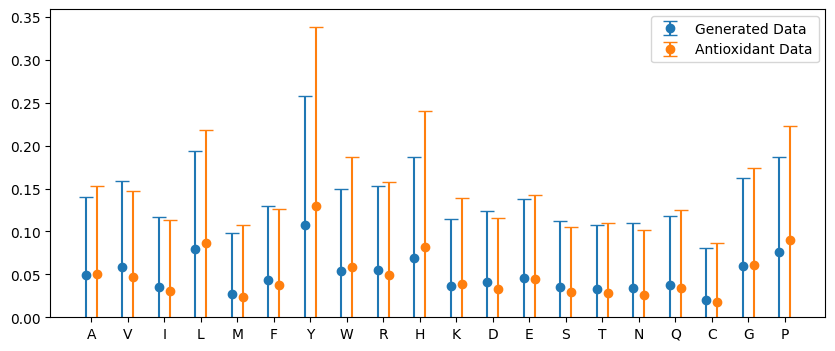

In [9]:
aa_labels = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W', 'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P']
x_pos = np.arange(len(aa_labels))

fig, ax = plt.subplots(figsize=(10,4))
ax.errorbar(x_pos-0.15, gen_data_mean, yerr=gen_data_std, fmt='o', capsize=5, label = "Generated Data")
ax.errorbar(x_pos+0.15, antiox_df_mean, yerr=antiox_df_std, fmt='o', capsize=5, label = "Antioxidant Data")
ax.set_xticks(x_pos)
ax.set_xticklabels(aa_labels)
ax.set_ylim(ymin=0)
plt.legend()
plt.savefig('plots/barplots/mixed_gen_antiox_aafraction_distribution_stdev.pdf')

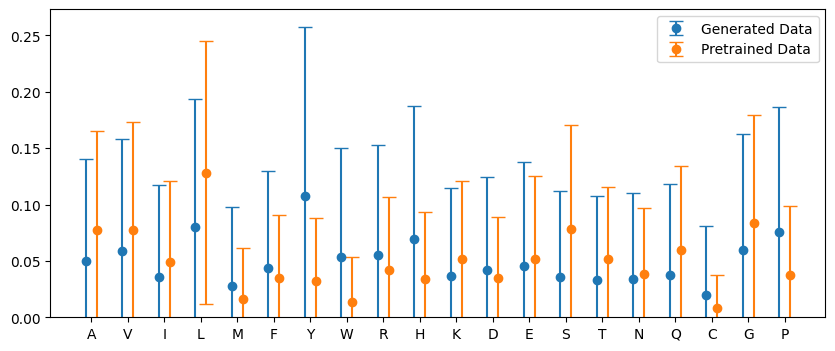

In [10]:
aa_labels = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W', 'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P']
x_pos = np.arange(len(aa_labels))

fig, ax = plt.subplots(figsize=(10,4))
ax.errorbar(x_pos-0.15, gen_data_mean, yerr=gen_data_std, fmt='o', capsize=5, label = "Generated Data")
ax.errorbar(x_pos+0.15, pretrain_df_mean, yerr=pretrain_df_std, fmt='o', capsize=5, label = "Pretrained Data")
ax.set_xticks(x_pos)
ax.set_xticklabels(aa_labels)
ax.set_ylim(ymin=0)
plt.legend()
plt.savefig('plots/barplots/mixed_gen_pretrain_aafraction_distribution_stdev.pdf')

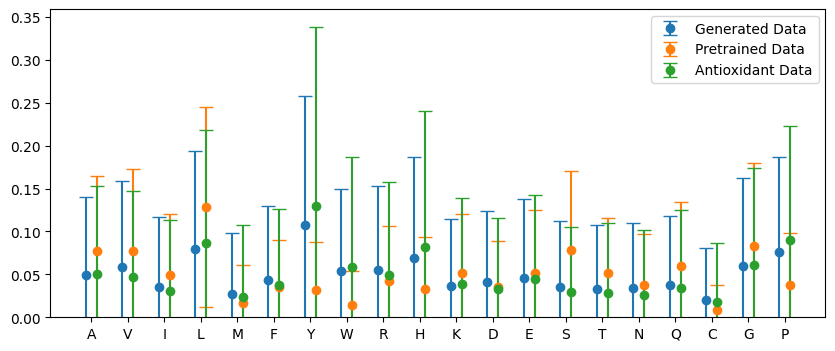

In [11]:
aa_labels = ['A','V', 'I', 'L', 'M', 'F', 'Y', 'W', 'R', 'H', 'K', 'D', 'E', 'S', 'T', 'N', 'Q', 'C', 'G', 'P']
x_pos = np.arange(len(aa_labels))

fig, ax = plt.subplots(figsize=(10,4))
ax.errorbar(x_pos-0.15, gen_data_mean, yerr=gen_data_std, fmt='o', capsize=5, label = "Generated Data")
ax.errorbar(x_pos+0.15, pretrain_df_mean, yerr=pretrain_df_std, fmt='o', capsize=5, label = "Pretrained Data")
ax.errorbar(x_pos+0.15, antiox_df_mean, yerr=antiox_df_std, fmt='o', capsize=5, label = "Antioxidant Data")
ax.set_xticks(x_pos)
ax.set_xticklabels(aa_labels)
ax.set_ylim(ymin=0)
plt.legend()
plt.savefig('plots/barplots/mixed_all_aafraction_distribution_stdev.pdf')

Violin plots

In [12]:
pretrain_df["Set"] = "Pretrained"
pretrain_df = pretrain_df[["Sequence", "Set"]]
pretrain_df.rename(columns={"Sequence":"Sequence"}, inplace=True)
antiox_df["Set"] = "Antioxidant"
antiox_df = antiox_df[["Sequence", "Set"]]
gen_data["Set"]= "Generated"
gen_data = gen_data[["Sequence", "Set"]]
df = pd.concat([pretrain_df, antiox_df, gen_data], ignore_index=True)
df["Sequence"] = df["Sequence"].astype(str)

In [13]:
df.head()

,Sequence,Set
0,SIVMPVG,Pretrained
1,SQPMHA,Pretrained
2,WDINTPAFEWSGLSIEMP,Pretrained
3,AHCGDSRAAHCGDSRAV,Pretrained
4,VGAVGVGKSALTIQ,Pretrained


In [14]:
df['HydroMoment'] = df.Sequence.apply(hydr_moment)

In [15]:
df['Fraction_PosCharges'] = df.Sequence.apply(frac_pos_charges)

In [16]:
df["Hydrophobicity"] = df.Sequence.map(lambda x: assign_hydrophobicity(x.upper()))
df["Average_Hydrophobicity"] = df["Hydrophobicity"].map(lambda x: sum(x)/len(x)) 

In [17]:
sns.set(rc={'figure.figsize':(16, 8)})
pretrained = df[df["Set"] == "Pretrained"].copy()
antiox = df[df["Set"] == "Antioxidant"].copy()
generated = df[df["Set"] == "Generated"].copy()
figure1 = pd.concat([pretrained, antiox, generated])
my_pal = {"Pretrained": "g", "Antioxidant": "b", "Generated": "r"}

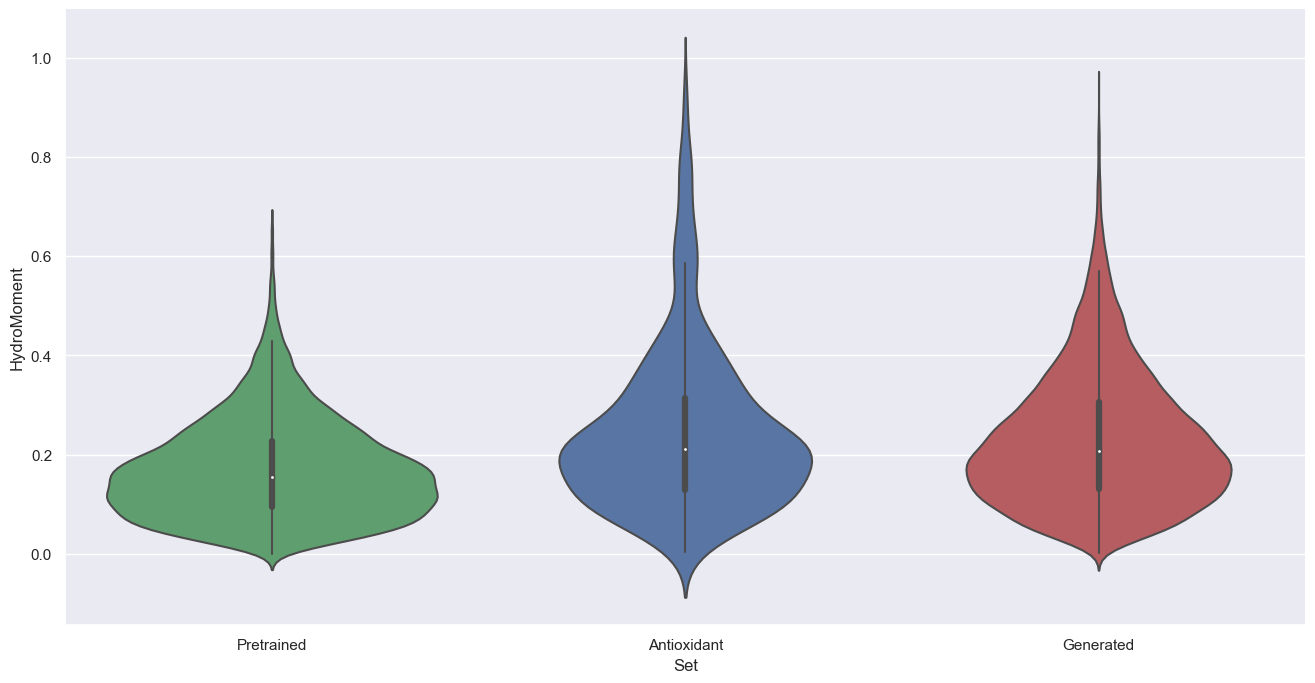

In [18]:
ax = sns.violinplot(x='Set', y='HydroMoment', data=figure1, palette=my_pal)
sns.set(font_scale = 2)
sns.set_style('ticks')
sns.despine()
plt.savefig('plots/violin/violin_HydroMoment_figure1.pdf', bbox_inches='tight')

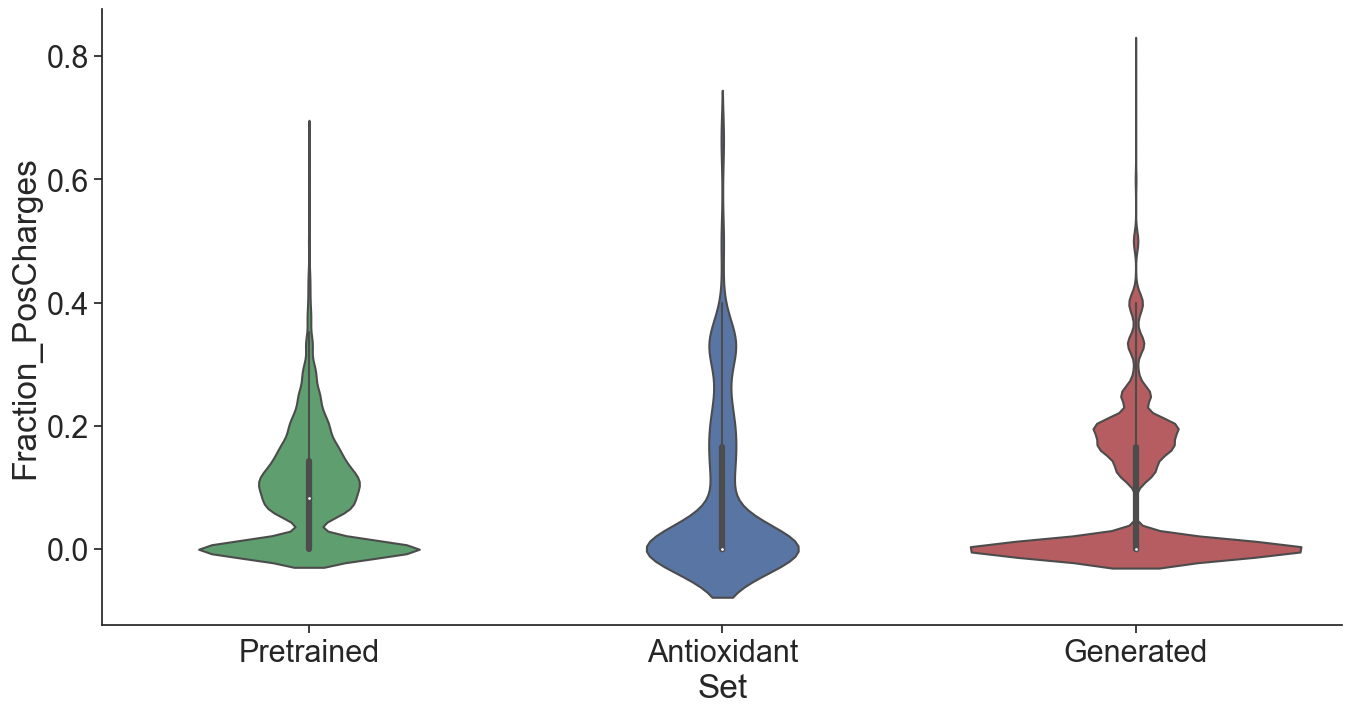

In [19]:
ax = sns.violinplot(x='Set', y='Fraction_PosCharges', data=figure1, palette=my_pal)
sns.set(font_scale = 2)
sns.set_style('ticks')
sns.despine()
plt.savefig('plots/violin/violin_fraction_PosCharges_figure1.pdf', bbox_inches='tight')

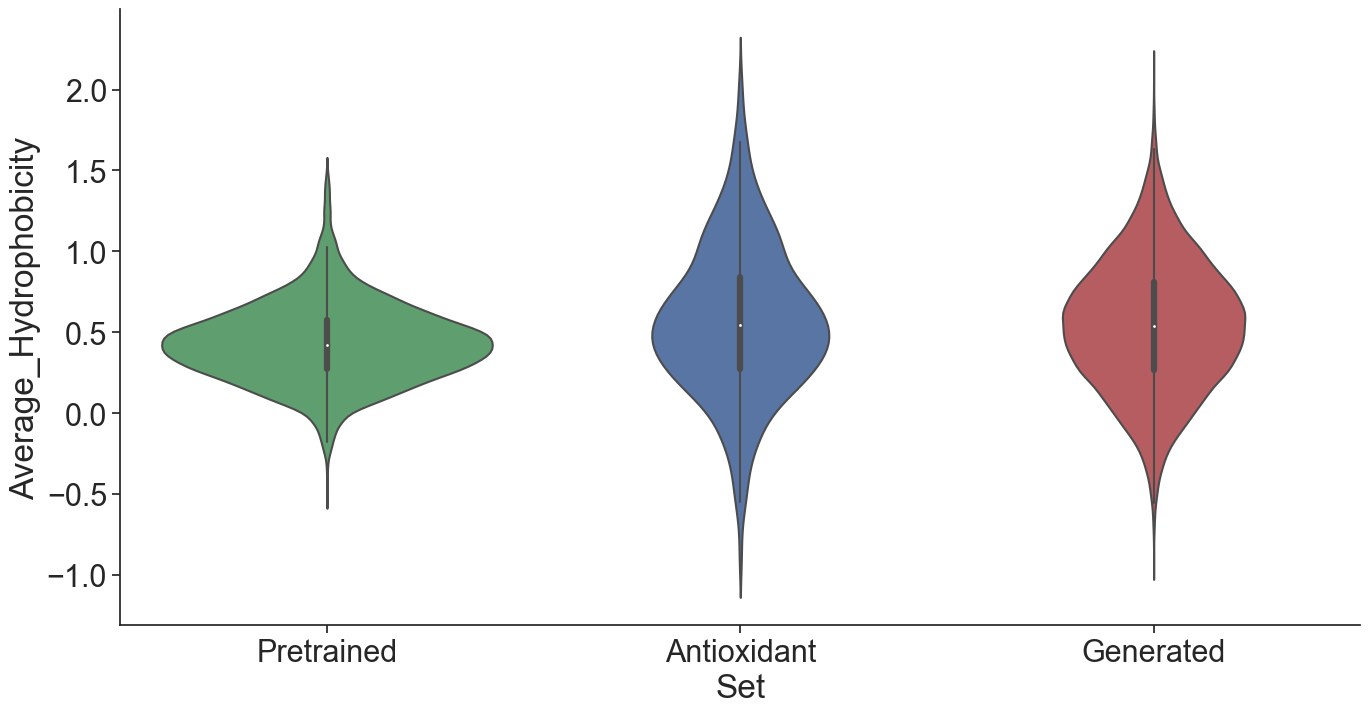

In [20]:
ax = sns.violinplot(x='Set', y='Average_Hydrophobicity', data=figure1, palette=my_pal)
sns.set(font_scale = 2)
sns.set_style('ticks')
sns.despine()
plt.savefig('plots/violin/violin_Average_Hydrophobicity_figure1.pdf', bbox_inches='tight')